In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, FileUpload
import torch
import torch.nn as nn
import torch.optim as optim

from fastbook import *
from fastai.vision.widgets import *
import os
import matplotlib.pyplot as plt
import platform
from PIL import Image, UnidentifiedImageError


import random
import math
import warnings

import time
from IPython.display import clear_output

Plot gespeichert als diabetes.png


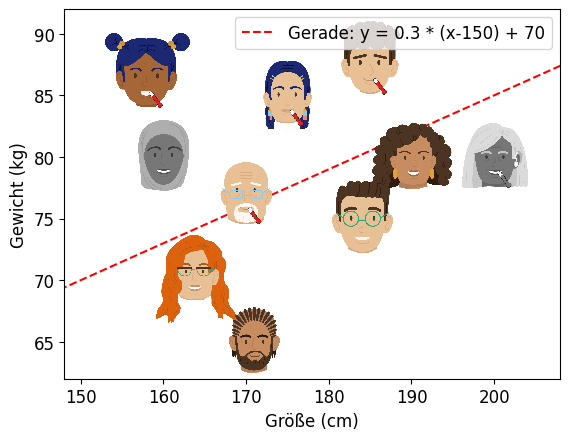

In [19]:


def hundOderKatzeMitGerade(filename="test.png",save=False):
    # Feste Werte für Größe (in cm) und Gewicht (in kg)
    # Daten für Katzen
    hoffset = 140
    woffset = 50
    cat_heights = [20, 24, 31, 44, 50]  # Größe zwischen 22 und 30 cm
    cat_weights = [30, 20, 15, 25, 30]  # Gewicht zwischen 4 und 8 kg

    cat_heights = [height+hoffset for height in cat_heights] 
    cat_weights = [weight+woffset for weight in cat_weights] 


    # Daten für Hunde
    dog_heights = [18, 30, 35, 60, 45]  # Größe zwischen 45 und 65 cm
    dog_weights = [37, 27, 35, 30, 38]  # Gewicht zwischen 15 und 35 kg

    dog_heights = [height+hoffset for height in dog_heights] 
    dog_weights = [weight+woffset for weight in dog_weights] 
    
    

    def get_image(path, zoom=0.07):  # Angepasste Zoomstufe
        return OffsetImage(mpimg.imread(path), zoom=zoom)

    def geradengleichung(x):
        steigung=0.3
        y_achs=70
        verschieb=150
        return steigung * (x-verschieb) + y_achs
    
    fig, ax = plt.subplots()

    
    # Scatterplot für Katzen erstellen und falsch kategorisierte Katzen zählen
    cat_count = 0
    for i in range(len(cat_heights)):
        if cat_weights[i]>geradengleichung(cat_heights[i]):
            ab = AnnotationBbox(get_image("person"+str(i+1)+"ab.png"), (cat_heights[i], cat_weights[i]), frameon=False)
            cat_count+=1
        else:
            ab = AnnotationBbox(get_image("person"+str(i+1)+"a.png"), (cat_heights[i], cat_weights[i]), frameon=False)
        ax.add_artist(ab)
 
        # Scatterplot für Hunde erstellen
    dog_count = 0
    for i in range(len(dog_heights)):
        if dog_weights[i]<geradengleichung(dog_heights[i]):
            ab = AnnotationBbox(get_image("person"+str(i+6)+"ab_krank.png"), (dog_heights[i], dog_weights[i]), frameon=False)
            dog_count+=1
        else:
            ab = AnnotationBbox(get_image("person"+str(i+6)+"a_krank.png"), (dog_heights[i], dog_weights[i]), frameon=False)
        ax.add_artist(ab)

    # Gerade hinzufügen
    x_vals = np.linspace(140, 220, 100)  # Erzeuge 100 Werte zwischen 10 und 70
    y_vals = geradengleichung(x_vals)  # Berechne die y-Werte basierend auf der Geradengleichung
    ax.plot(x_vals, y_vals, '--', color='red', label=f'Gerade: y = 0.3 * (x-150) + 70')

    # Achsenbeschriftungen und -limits setzen
    ax.set_xlim(148, 208)
    ax.set_ylim(62, 92)
    ax.set_xlabel('Größe (cm)')
    ax.set_ylabel('Gewicht (kg)')
    ax.legend()  # Legende hinzufügen   

        # Gesamtabstände ausgeben
        #print(f'Anzahl der falsch kategorisierten Katzen: {cat_count:.2f}')
        #print(f'Anzahl der falsch kategorisierten Hunde: {dog_count:.2f}')
        #print(f'Verlustfunktion - Summe beider Werte:  {cat_count+dog_count:.2f}')

        # Speichere den Plot als Bilddatei, wenn gewünscht
    if save:
        plt.savefig(filename, dpi=300, bbox_inches='tight')  # Speicher als PNG
        print("Plot gespeichert als "+filename)
        
    plt.show()

hundOderKatzeMitGerade("diabetes.png",True)